<a href="https://colab.research.google.com/github/sakuna47/Intelligent-Resume-Screening-System/blob/Code/Intelligent_Resume_Screening_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Path to main folder
main_path = '/content/drive/MyDrive/Intelligent Resume Screening System/'
data_path = main_path + 'data/data/'
resume_path = main_path + 'Resume/Resume.csv'


Mounted at /content/drive


EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load CSV
resume_df = pd.read_csv(resume_path)
resume_df.head()


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
resume_df.info()
resume_df['Category'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
ADVOCATE,118
CHEF,118
ENGINEERING,118
ACCOUNTANT,118
FINANCE,118
FITNESS,117
AVIATION,117


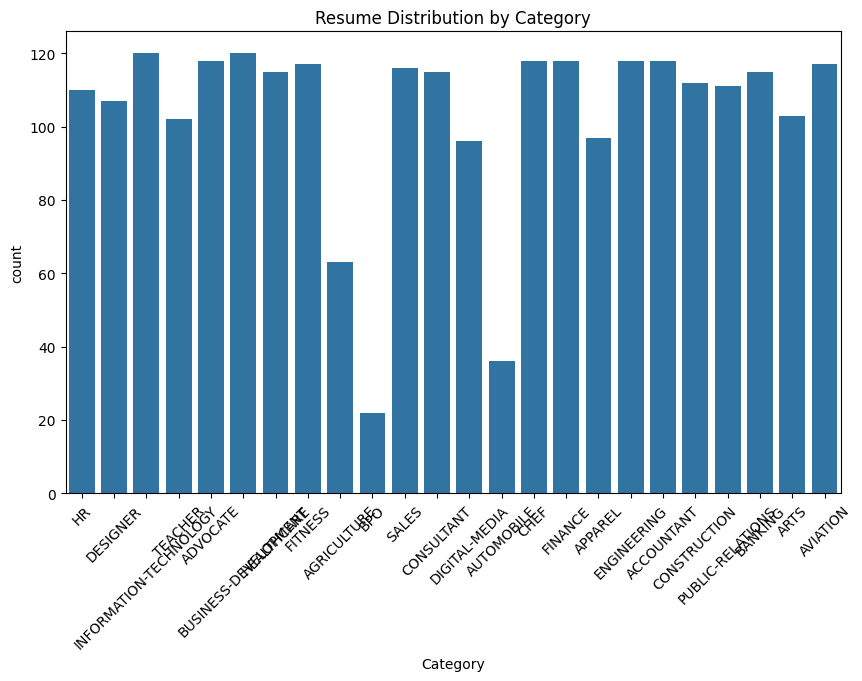

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=resume_df)
plt.xticks(rotation=45)
plt.title('Resume Distribution by Category')
plt.show()


Text Preprocessing

In [5]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

#   column name
resume_df['Cleaned_Text'] = resume_df['Resume_str'].apply(clean_text)
resume_df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,Resume_str,Resume_html,Category,Cleaned_Text
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate hr admini...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary years experience recruitin...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depar...


Split Data

In [6]:
from sklearn.model_selection import train_test_split

X = resume_df['Cleaned_Text']
y = resume_df['Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Vectorization (TF-IDF)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Model Training (ML Baseline)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

y_pred = lr_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6519114688128773
                        precision    recall  f1-score   support

            ACCOUNTANT       0.67      0.83      0.74        24
              ADVOCATE       0.35      0.54      0.43        24
           AGRICULTURE       1.00      0.46      0.63        13
               APPAREL       0.67      0.21      0.32        19
                  ARTS       0.46      0.29      0.35        21
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.86      0.75      0.80        24
               BANKING       0.83      0.65      0.73        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.46      0.79      0.58        24
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.82      0.82      0.82        22
            CONSULTANT       0.44      0.17      0.25        23
              DESIGNER       0.84      0.76      0.80        21
         D

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


UPDATED HIGH-ACCURACY ML BASELINE

In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Load Dataset

In [11]:
resume_path = '/content/drive/MyDrive/Intelligent Resume Screening System/Resume/Resume.csv'
resume_df = pd.read_csv(resume_path)

resume_df.head()


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


Improved Text Cleaning

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_v2(text):
    text = str(text).lower()
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    words = text.split()
    words = [
        lemmatizer.lemmatize(w)
        for w in words
        if w not in stop_words and len(w) > 2
    ]
    return ' '.join(words)

resume_df['Cleaned_Text'] = resume_df['Resume_str'].apply(clean_text_v2)


Train-Test Split

In [13]:
X = resume_df['Cleaned_Text']
y = resume_df['Category']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


High-Quality TF-IDF Vectorizer

In [14]:
vectorizer = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 2),   # Unigrams + bigrams
    min_df=2,
    max_df=0.9,
    sublinear_tf=True
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Train STRONG Text Classifier (Linear SVM)

In [15]:
svm_model = LinearSVC(
    class_weight='balanced',
    random_state=42
)

svm_model.fit(X_train_tfidf, y_train)


LinearSVC(class_weight='balanced', random_state=42)

Evaluation

In [16]:
y_pred = svm_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7223340040241448
                        precision    recall  f1-score   support

            ACCOUNTANT       0.68      0.88      0.76        24
              ADVOCATE       0.65      0.62      0.64        24
           AGRICULTURE       0.82      0.69      0.75        13
               APPAREL       0.64      0.37      0.47        19
                  ARTS       0.71      0.48      0.57        21
            AUTOMOBILE       0.80      0.57      0.67         7
              AVIATION       0.83      0.79      0.81        24
               BANKING       0.86      0.78      0.82        23
                   BPO       0.33      0.25      0.29         4
  BUSINESS-DEVELOPMENT       0.70      0.88      0.78        24
                  CHEF       0.86      0.75      0.80        24
          CONSTRUCTION       0.75      0.82      0.78        22
            CONSULTANT       0.82      0.39      0.53        23
              DESIGNER       0.86      0.90      0.88        21
         D